# Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data 

In [2]:
data = pd.read_csv('new_app_data.csv')


In [3]:
data

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CM_count,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [4]:
response = data['enrolled']

In [5]:
data = data.drop(columns='enrolled')

# spltting the dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, response, test_size = 0.2, random_state= 0)

# Removing Identifiers

In [7]:
training_identity = X_train['user']

X_train = X_train.drop(columns=['user'])

testing_identity = X_test['user']

X_test = X_test.drop(columns=['user'])

# feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_x.transform(X_test))

In [15]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [19]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [22]:
X_train = X_train2
X_test = X_test2

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state= 0, penalty= 'l1')
Classifier.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the test set

In [28]:
y_pred = Classifier.predict(X_test)

# Confusion matrix, Classification report

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2378, 1401],
       [1098, 5123]], dtype=int64)

In [35]:
Class_report = classification_report(y_test, y_pred)
print(Class_report)

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      3779
           1       0.79      0.82      0.80      6221

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



In [36]:
accuracy_score(y_test, y_pred)

0.7501

In [37]:
precision_score(y_test, y_pred)

0.7852544451256898

In [38]:
recall_score(y_test, y_pred)

0.8235010448480952

In [39]:
f1_score(y_test, y_pred)

0.8039231071008238

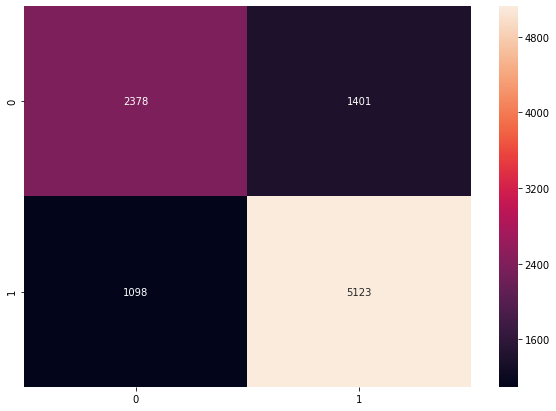

In [47]:
plt.figure(figsize=[10,7])
sns.heatmap(conf_matrix, annot= True, fmt='g')
plt.show()

# Applying K-fold Cross validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
accuracies = cross_val_score(estimator= Classifier, X=X_train, y= y_train, cv=10 )

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [51]:
accuracies.mean()

0.757025009657813

In [52]:
accuracies.std()

0.005137369804512049

# Formatting the final results 

In [58]:
final_results = pd.concat([testing_identity,y_test] , axis = 1).dropna()
final_results['Predicted_results']= y_pred
final_results[['user', 'enrolled', 'Predicted_results']].reset_index(drop= True)


,user,enrolled,Predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


# Appling Grid_search

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l1', 'l2']

parameters = dict(C=C, penalty = penalty)

grid_search = GridSearchCV(estimator= Classifier,
                            param_grid = parameters,
                             scoring= 'accuracy',
                               verbose= 2,
                                n_jobs= -1,
                                 cv=10)

In [63]:
grid_search = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  2.3min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
grid_search.best_index_

4

In [66]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [67]:
grid_search.best_score_

0.75705